---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [9]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "../lab 2 data/train.p"
testing_file = "../lab 2 data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [10]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = (32, 32)

# TODO: how many classes are in the dataset
n_classes = 43

image_size = 32
n_channels = 3

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


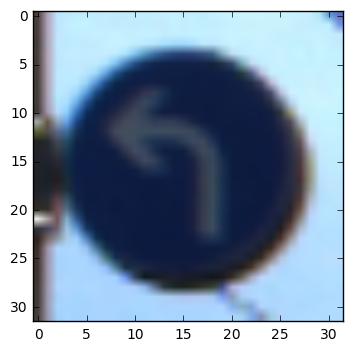

[85 84 87]
39209
32
32
3
1024


In [11]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
height, width, channels = X_train[0].shape
plt.imshow(X_train[34044], 'gray')
plt.show()
print(X_train[0][31][0])
print(len(X_train))
print(len(X_train[0]))
print(len(X_train[0][0]))
print(len(X_train[0][0][0]))
print(image_shape[0]*image_shape[1])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [12]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

def normalize_greyscale(image_data):
    x_min = 0
    x_max = 255
    a = 0.1
    b = 0.9
    return a + (image_data - x_min) * (b - a) / (x_max - x_min)

train_features = normalize_greyscale(X_train)
test_features = normalize_greyscale(X_test)

# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
train_labels = encoder.transform(y_train)
test_labels = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)
is_labels_encod = True

print('Labels One-Hot Encoded')

[75 78 80]
Train Features: 
0.335294117647
[[[ 75  78  80]
  [ 74  76  78]
  [ 83  84  83]
  ..., 
  [ 67  74  73]
  [ 65  69  68]
  [ 66  67  66]]

 [[ 82  83  85]
  [ 80  80  82]
  [ 87  86  83]
  ..., 
  [ 73  77  77]
  [ 75  77  75]
  [ 79  79  77]]

 [[ 79  79  81]
  [ 84  83  85]
  [ 91  88  89]
  ..., 
  [ 72  74  72]
  [ 74  75  71]
  [ 78  78  74]]

 ..., 
 [[126 128 133]
  [118 123 128]
  [108 117 120]
  ..., 
  [ 96  96  90]
  [ 99 101  94]
  [ 99 103  99]]

 [[ 90  94  98]
  [ 91  97 103]
  [ 77  87  92]
  ..., 
  [104 104  97]
  [107 111 102]
  [ 95 103  97]]

 [[ 85  84  87]
  [ 93  99 104]
  [ 69  80  85]
  ..., 
  [101 102  94]
  [ 98 101  90]
  [ 90  97  89]]]
Labels One-Hot Encoded


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [13]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
train_features, valid_features, train_labels, valid_labels = train_test_split(
    train_features,
    train_labels,
    test_size=0.05,
    random_state=832289)
train_features = np.reshape(train_features, [-1, 3072])
valid_features = np.reshape(valid_features, [-1, 3072])
test_features = np.reshape(test_features, [-1, 3072])

print('Training features and labels randomized and split.')

Training features and labels randomized and split.


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tqdm import tqdm
import math

features_count = 3072
labels_count = n_classes

# Convolutional layer 1
filter_size1 = 5
num_filters1 = 16

# Convolutional Layer 2
filter_size2 = 5
num_filters2 = 36

# Fully-connected Layer
fc_size = 128

print('Layer properties defined')

Layer properties defined


In [16]:
# Weights initialization helper function
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev = 0.05))
    #return tf.Variable(np.random.randn(np.prod(shape)) / np.sqrt(np.prod(shape[:-1])), dtype = tf.float32)

# Biases initialization helper function
def new_biases(length):
    return tf.Variable(tf.zeros(shape = [length]))

Initialization helper functions defined


In [17]:
# Convolution layer definition
def new_conv_layer(input,
                   num_input_channels,
                   filter_size,
                   num_filters,
                   use_pooling = True):
    
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    weights = new_weights(shape = shape) 
    
    biases = new_biases(length = num_filters)
    
    layer = tf.nn.conv2d(input = input,
                         filter = weights,
                         strides = [1, 1, 1, 1],
                         padding = 'SAME')
    
    layer += biases
    
    if use_pooling:
        layer = tf.nn.max_pool(value = layer,
                               ksize = [1, 2, 2, 1],
                               strides = [1, 2, 2, 1],
                               padding = 'SAME')
        
    layer = tf.nn.relu(layer)
    
    return layer, weights

In [18]:
# Layer to flatten feature before passing to fully connected layers
def flatten_layer(layer):
    layer_shape = layer.get_shape()
    
    num_features = layer_shape[1:4].num_elements()
    
    layer_flat = tf.reshape(layer, [-1, num_features])
    
    return layer_flat, num_features

In [19]:
# Fully connected layer defintion
def new_fc_layer(input,
                 num_inputs,
                 num_outputs,
                 use_relu = True):
    weights = new_weights(shape = [num_inputs, num_outputs])
    biases = new_biases(length = num_outputs)
    
    layer = tf.matmul(input, weights) + biases
    
    if use_relu:
        layer = tf.nn.relu(layer)
        
    return layer

In [20]:
# Feature and label TensorFlow placeholders
x = tf.placeholder(tf.float32, shape = [None, features_count], name = 'x')

x_image = tf.reshape(x, [-1, image_size, image_size, n_channels])

y_true = tf.placeholder(tf.float32, shape = [None, n_classes], name = 'y_true')

y_true_cls = tf.argmax(y_true, dimension = 1)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [21]:
# Defining architecture layers

layer_conv1, weights_conv1 =\
    new_conv_layer(input = x_image,
                  num_input_channels = n_channels,
                  filter_size = filter_size1,
                  num_filters = num_filters1,
                  use_pooling = True)
    

layer_conv2, weights_conv2 =\
    new_conv_layer(input = layer_conv1,
                  num_input_channels = num_filters1,
                  filter_size = filter_size2,
                  num_filters = num_filters2,
                  use_pooling = True)
    
layer_flat, num_features = flatten_layer(layer_conv2)

layer_fc1 = new_fc_layer(input = layer_flat,
                         num_inputs = num_features,
                         num_outputs = fc_size,
                         use_relu = True)

layer_fc2 = new_fc_layer(input = layer_fc1,
                         num_inputs = fc_size,
                         num_outputs = n_classes,
                         use_relu = False)

y_pred = tf.nn.softmax(layer_fc2)

y_pred_cls = tf.argmax(y_pred, dimension = 1)

# Cross entropy function
#cross_entropy = -tf.reduce_sum(labels * tf.log(tf.clip_by_value(prediction,1e-10,1.0)), 
#                                              reduction_indices=[1])

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)
# Loss function
loss = tf.reduce_mean(cross_entropy)

#Define feed dictionaries
train_feed_dict = {x: train_features, y_true: train_labels}
valid_feed_dict = {x: valid_features, y_true: valid_labels}
test_feed_dict = {x: test_features, y_true: test_labels}

# Determine if the predictions are correct
is_correct_prediction = tf.equal(y_pred_cls, y_true_cls)
# Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

In [23]:
# Checking execution time by running one Forward/Backprop loop, currently takes ~10 min
# Redundant with next cell

# Hyperparameters
batch_size = 64
learning_rate = 0.2

# Optimizer Function
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)    

# The accuracy measured against the validation set
validation_accuracy = 0.0
session = tf.Session()
session.run(tf.initialize_all_variables())
batch_start = 0
batch_size = 10
batch_features = train_features[batch_start:batch_start + batch_size]
batch_labels = train_labels[batch_start:batch_start + batch_size]
_, l = session.run([optimizer, loss],
                   feed_dict={x: batch_features, y_true: batch_labels})
#training_accuracy = session.run(accuracy, feed_dict={x: batch_features, y_true: batch_labels})
training_accuracy = session.run(accuracy, feed_dict = train_feed_dict)
print(training_accuracy)
#validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

0.2


In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.
# ToDo: Find the best parameters for each configuration

# Hyperparameters
epochs = 7
batch_size = 64
learning_rate = 0.2


# Gradient Descent
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)    

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 64
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

init = tf.initialize_all_variables()

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={x: batch_features, y_true: batch_labels})

            # Log every 50 batches
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)

        # Check accuracy against Validation data
        validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))

In [ ]:
# ToDo: Set the epochs, batch_size, and learning_rate with the best parameters from problem 3
epochs = 7
batch_size = 64
learning_rate = 0.2



### DON'T MODIFY ANYTHING BELOW ###
# The accuracy measured against the test set
test_accuracy = 0.0

with tf.Session() as session:
    
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            # Run optimizer
            _ = session.run(optimizer, feed_dict={x: batch_features, y_train: batch_labels})

        # Check accuracy against Test data
        test_accuracy = session.run(accuracy, feed_dict=test_feed_dict)


assert test_accuracy >= 0.80, 'Test accuracy at {}, should be equal to or greater than 0.80'.format(test_accuracy)
print('Nice Job! Test Accuracy is {}'.format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.